In [9]:
import MeCab

In [41]:
path = './data/neko.txt'
with open(path) as f:
    txt = f.read()

In [43]:
tagger = MeCab.Tagger("")

In [55]:
parse_result = tagger.parse(txt)
with open('./work/neko.txt.mecab', mode='w') as f:
    f.write(parse_result)

In [57]:
!mecab ./data/neko.txt -o ./work/neko.txt.mecab

# 30. 形態素解析結果の読み込み

In [2]:
def morpheme_dict(parse_result):
    splited_parse_result = parse_result.split('\t')
    splited_parse_result[1] = splited_parse_result[1].split(',')
    return {
        'surface':splited_parse_result[0],
        'base':splited_parse_result[1][6],
        'pos':splited_parse_result[1][0],
        'pos1':splited_parse_result[1][1]
    }
    
    
sentence_list = list() 
with open('./work/neko.txt.mecab', mode='r') as f:
    sentence = list() 
    for line in f:
        line = line.rstrip()
        if line == 'EOS':
            if sentence: sentence_list.append(sentence)
            sentence = list()
            continue
        sentence.append(morpheme_dict(line))

In [3]:
for i in range(5):
    print(sentence_list[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生

# 31. 動詞

In [4]:
verb_list = [morpheme['surface'] for sentence in sentence_list for morpheme in sentence if morpheme['pos'] == '動詞']

In [5]:
for i in range(5):
    print(verb_list[i])

生れ
つか
し
泣い
し


# 32. 動詞の原形

In [6]:
prototype_verb_list = [morpheme['base'] for sentence in sentence_list for morpheme in sentence if morpheme['pos'] == '動詞']

In [7]:
for i in range(5):
    print(prototype_verb_list[i])

生れる
つく
する
泣く
する


# 33. 「AのB」

In [8]:
noun_phrase_list = list()
for sentence in sentence_list:
    for idx in range(len(sentence) - 2):
        slice_sentence = sentence[idx:idx + 3]
        if slice_sentence[1]['pos'] == '助詞' and slice_sentence[1]['surface'] == 'の':
            if slice_sentence[0]['pos'] == '名詞' and slice_sentence[2]['pos'] == '名詞':
                noun_phrase_list.append(slice_sentence[0]['surface'] + 'の' + slice_sentence[2]['surface'])

In [9]:
for i in range(5):
    print(noun_phrase_list[i])

彼の掌
掌の上
書生の顔
はずの顔
顔の真中


# 34. 名詞の連接

In [14]:
connected_noun_list = list()
for sentence in sentence_list:
    noun_list = list() 
    for morpheme in sentence:
        if morpheme['pos'] == '名詞':
            noun_list.append(morpheme['surface'])
        else:
            if noun_list:
                connected_noun_list.append(''.join(noun_list))
                noun_list = list() 
    if noun_list:
        connected_noun_list.append(''.join(noun_list))

In [18]:
for i in range(10):
    print(connected_noun_list[i])

一
吾輩
猫
名前
どこ
見当
何
所
ニャーニャー
いた事


# 35. 単語の出現頻度

In [19]:
from collections import defaultdict

In [20]:
word_dict = defaultdict(int)
for sentence in sentence_list:
    for morpheme in sentence:
        word_dict[morpheme['base']] += 1
sorted_word_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

In [21]:
for i in range(5):
    print(sorted_word_dict[i])

('の', 9194)
('。', 7486)
('て', 6848)
('、', 6772)
('は', 6420)


# 36. 頻度上位10語

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "AppleGothic"

<BarContainer object of 10 artists>

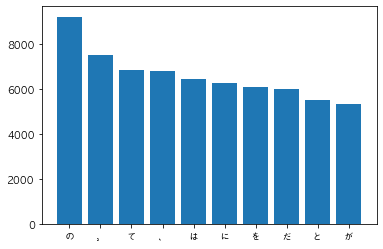

In [23]:
freq_word = np.array(sorted_word_dict[:10])
label = freq_word[:,0]
data = freq_word[:,1].astype(np.int)
plt.bar(label, data)

# 37. 「猫」と共起頻度の高い上位10語

In [24]:
cat_co_occurrence_dict = defaultdict(int)
for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme['surface'] == '猫':
            for co_occurrence in sentence:
                if co_occurrence['surface'] != '猫':
                    cat_co_occurrence_dict[co_occurrence['surface']] += 1
            break
sorted_cat_co_occurrence_dict = sorted(cat_co_occurrence_dict.items(), key=lambda x: x[1], reverse=True)

<BarContainer object of 10 artists>

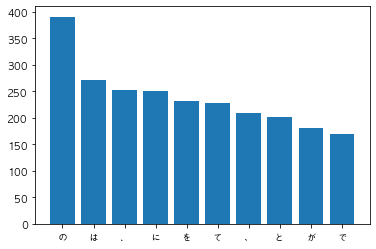

In [25]:
freq_word = np.array(sorted_cat_co_occurrence_dict[:10])
label = freq_word[:,0]
data = freq_word[:,1].astype(np.int)
plt.bar(label, data)

# 38. ヒストグラム

(array([1.1218e+04, 1.3000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.2030e+02, 1.8396e+03, 2.7589e+03, 3.6782e+03,
        4.5975e+03, 5.5168e+03, 6.4361e+03, 7.3554e+03, 8.2747e+03,
        9.1940e+03]),
 <a list of 10 Patch objects>)

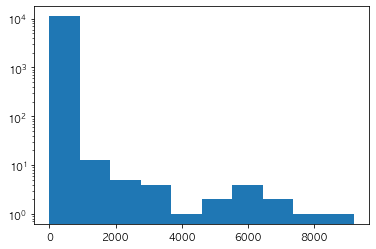

In [26]:
freq_word = np.array(sorted_word_dict)
data = freq_word[:,1].astype(np.int)
plt.hist(data, bins=10, log=True)

# 39. Zipfの法則

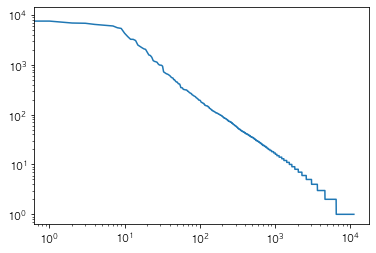

In [27]:
plt.loglog(data)